In [1]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import (SMOTE, BorderlineSMOTE, SVMSMOTE, SMOTENC,
                                    KMeansSMOTE)
from imblearn.over_sampling import RandomOverSampler
from imblearn.base import BaseSampler

# Helper Functions

In [2]:
def create_dataset(n_samples=1000, weights=(0.01, 0.01, 0.98), n_classes=3,
                   class_sep=0.8, n_clusters=1):
    return make_classification(n_samples=n_samples, n_features=2,
                               n_informative=2, n_redundant=0, n_repeated=0,
                               n_classes=n_classes,
                               n_clusters_per_class=n_clusters,
                               weights=list(weights),
                               class_sep=class_sep, random_state=0)

In [3]:
def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

# Creating an Imbalanced Dataset

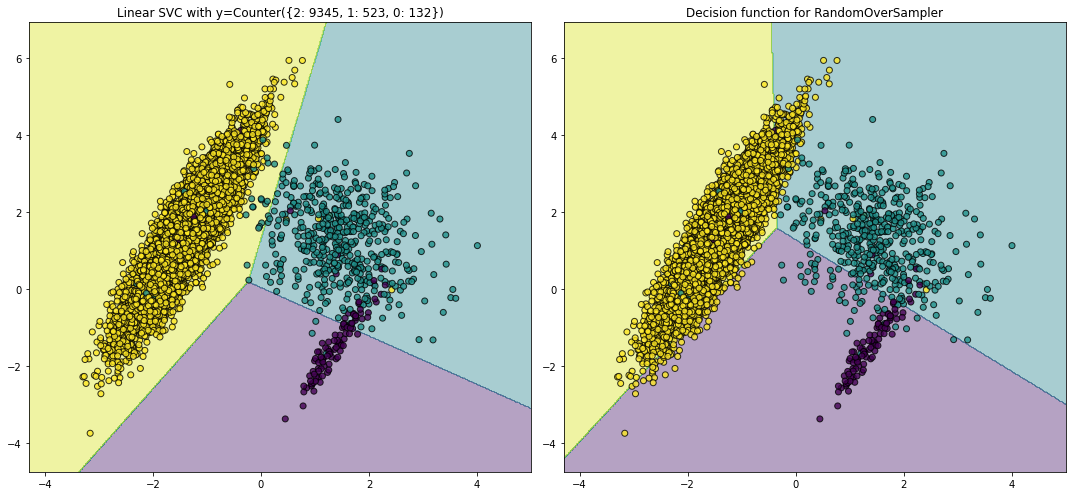

In [4]:
# create axes for figure
# and create imbalanced dataset
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
X, y = create_dataset(n_samples=10000, weights=(0.01, 0.05, 0.94), class_sep=1.4)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# make classifier (logistic regression)
clf = LogisticRegression().fit(X_train, y_train)
plot_decision_function(X, y, clf, ax1)
ax1.set_title('Linear SVC with y={}'.format(Counter(y)))

# make classifier (Logistic Regression) with random over-sampling
pipe = make_pipeline(RandomOverSampler(random_state=0), LogisticRegression())
pipe.fit(X_train, y_train)
plot_decision_function(X, y, pipe, ax2)
ax2.set_title('Decision function for RandomOverSampler')
fig.tight_layout()

Cross Val Score 0.9880000000000001, Balanced Accuracy 0.8076001413767543 (Imbalanced)
Cross Val Score 0.9555, Balanced Accuracy 0.8295155548995754 (RandomOverSampling)


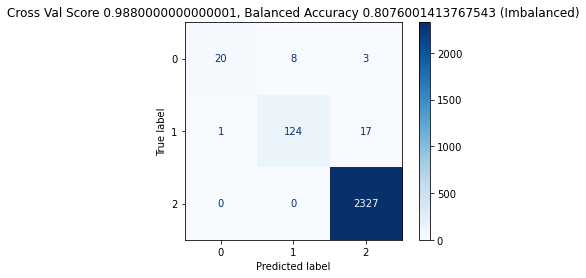

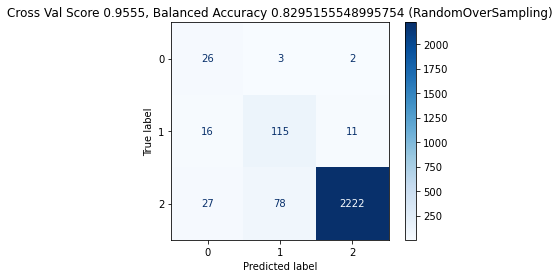

In [5]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score

c_v_score1 = cross_val_score(clf, X, y,cv=10).mean()
b_score1 = balanced_accuracy_score(y, clf.predict(X))

c_v_score2 = cross_val_score(pipe, X, y,cv=10).mean()
b_score2 = balanced_accuracy_score(y, pipe.predict(X))

titles_options = [("Cross Val Score {}, Balanced Accuracy {} (Imbalanced)".format(c_v_score1, b_score1),clf),
                  ("Cross Val Score {}, Balanced Accuracy {} (RandomOverSampling)".format(c_v_score2, b_score2),pipe)]

for title, classifier in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=np.unique(y),
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

    print(title)
    #print(disp.confusion_matrix)

plt.show()